# Implementing the Viterbi algorithm on trellises.


## Visualizing trellises
Author: Kristiina Oksner

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
#chatGPT
def generate_binary_strings(n):
    result = []
    generate_binary_strings_helper(n, "", result)
    return result

def generate_binary_strings_helper(n, current_string, result):
    if n == 0:
        result.append(current_string)
    else:
        generate_binary_strings_helper(n - 1, current_string + "0", result)
        generate_binary_strings_helper(n - 1, current_string + "1", result)

# Example usage:
n = 2
binary_strings = generate_binary_strings(n)
print(binary_strings)

def number_to_letter(num):
    if 1 <= num <= 26:
        # Convert the number to the corresponding letter
        letter = chr(ord('A') + num - 1)
        return letter
    else:
        return "Number out of range for the alphabet"

# Example usage:
number = 5
result = number_to_letter(number)
print(f"The corresponding letter for {number} is {result}")

def find_strings_with_letter(string_array, target_letter):
    return [s for s in string_array if target_letter in s]

# Example usage:
string_array = ["apple", "banana", "cherry", "date"]
target_letter = "a"

result = find_strings_with_letter(string_array, target_letter)
print(f"Strings containing the letter '{target_letter}': {result}")

def find_strings_ending_with(array, target_ending):
    return [s for s in array if s.endswith(target_ending)]

# Example usage:
string_array = ["A1101", "B1010", "C1111", "D0010", "E1100"]
target_ending = "10"

result = find_strings_ending_with(string_array, target_ending)
print(f"Strings ending with '{target_ending}': {result}")

def find_strings_starting_with_binary(array, target_start_binary):
    return [s for s in array if s[1:].startswith(target_start_binary)]

# Example usage:
string_array = ["A1101", "B1010", "C1111", "D0010", "E1100"]
target_start_binary = "10"

result = find_strings_starting_with_binary(string_array, target_start_binary)
print(f"Strings starting with binary '{target_start_binary}': {result}")

def replace_last_and_prepend(input_string, new_character):
    # Check if the string is not empty before replacing the last character
    if input_string:
        # Delete the last character and add a new one at the beginning
        modified_string = new_character + input_string[:-1]
        return modified_string
    else:
        return new_character

# Example usage:
original_string = "h"
new_character = "x"

modified_string = replace_last_and_prepend(original_string, new_character)
print(f"Modified String: {modified_string}")

def find_last_1_in_column(matrix, col_index):
    num_rows = len(matrix)

    last_1_row_index = -1  # Initialize to -1, indicating no occurrence of 1 yet

    for row_index in range(num_rows):
        if matrix[row_index][col_index] == 1:
            last_1_row_index = row_index

    return last_1_row_index

# Example usage:
matrix = [
    [0, 1, 0],
    [1, 0, 1],
    [0, 1, 1],
    [1, 0, 0]
]

col_index = 1

last_1_row_index = find_last_1_in_column(matrix, col_index)

if last_1_row_index != -1:
    print(f"The last 1 in column {col_index} is at row index {last_1_row_index}.")
else:
    print(f"There is no 1 in column {col_index}.")
def find_first_1_in_column(matrix, col_index):
    num_rows = len(matrix)

    for row_index in range(num_rows):
        if matrix[row_index][col_index] == 1:
            return row_index

    # If no occurrence of 1 in the column, return a value indicating no match
    return -1

# Example usage:
matrix = [
    [0, 1, 0],
    [1, 0, 1],
    [0, 1, 1],
    [1, 0, 0]
]

col_index = 1

first_1_row_index = find_first_1_in_column(matrix, col_index)

if first_1_row_index != -1:
    print(f"The first 1 in column {col_index} is at row index {first_1_row_index}.")
else:
    print(f"There is no 1 in column {col_index}.")

def binary_multiply_no_carry(bin_num1, bin_num2):
    result = 0

    for i in range(len(bin_num1)):
        if bin_num1[i] == '1' and bin_num2[i] == '1':
            result += 1

    return result % 2  # Take the result modulo 2 to get the non-carry sum

# Example usage:
binary_num1 = "1"
binary_num2 = "1"

result = binary_multiply_no_carry(binary_num1, binary_num2)
print(f"The product of {binary_num1} and {binary_num2} without carrying is {result}")

def create_string_from_indices(arr, indices):
    selected_elements = [str(arr[i]) for i in indices]
    result_string = ''.join(selected_elements)
    return result_string

# Example usage:
my_array = ['a', 'b', 'c', 'd', 'e']
my_indices = [1, 3, 4]

result = create_string_from_indices(my_array, my_indices)
print(f"The string created from the selected indices is: {result}")

def extract_number_from_string(input_string):
    # Find the index where the digit part starts
    digit_start_index = next(i for i, char in enumerate(input_string) if char.isdigit())

    # Extract the numeric part from the string
    numeric_value = int(input_string[digit_start_index])

    return numeric_value

# Example usage:
my_string = "A7"

numeric_value = extract_number_from_string(my_string)
print(f"The extracted number from the string is: {numeric_value}")

def replace_last_char(input_string, new_char):
    # Check if the input string is not empty
    if input_string:
        # Replace the last character with the new character
        modified_string = input_string[:-1] + new_char
        return modified_string
    else:
        return "Input string is empty."

# Example usage:
original_string = "hello"
new_character = "x"

modified_string = replace_last_char(original_string, new_character)
print(f"Modified String: {modified_string}")

def replace_first_digit(input_string, new_digit):
    # Find the index where the digit part starts
    digit_start_index = next((i for i, char in enumerate(input_string) if char.isdigit()), None)

    # Check if a digit was found
    if digit_start_index is not None:
        # Delete the first digit and add the new digit to the back
        modified_string = input_string[:digit_start_index] + input_string[digit_start_index + 1:] + str(new_digit)
        return modified_string
    else:
        return "No digit found after the letter."

# Example usage:
original_string = "A123"
new_digit = 5

modified_string = replace_first_digit(original_string, new_digit)
print(f"Modified String: {modified_string}")


['00', '01', '10', '11']
The corresponding letter for 5 is E
Strings containing the letter 'a': ['apple', 'banana', 'date']
Strings ending with '10': ['B1010', 'D0010']
Strings starting with binary '10': ['B1010']
Modified String: x
The last 1 in column 1 is at row index 2.
The first 1 in column 1 is at row index 0.
The product of 1 and 1 without carrying is 1
The string created from the selected indices is: bde
The extracted number from the string is: 7
Modified String: hellx
Modified String: A235


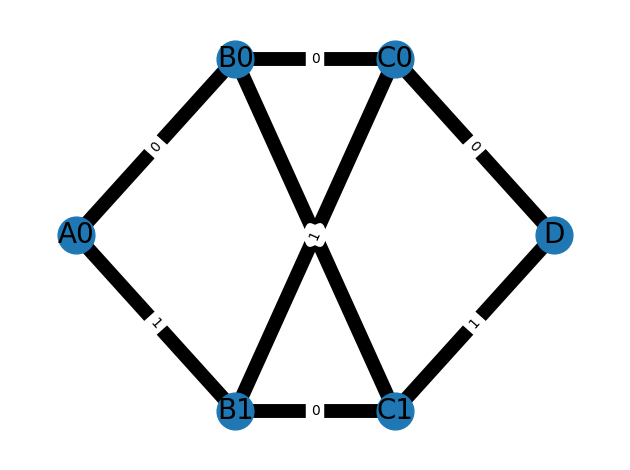

{('A0', 'B0'): 0, ('A0', 'B1'): 1, ('B0', 'C0'): 0, ('B0', 'C1'): 1, ('B1', 'C0'): 1, ('B1', 'C1'): 0, ('C0', 'D'): 0, ('C1', 'D'): 1}


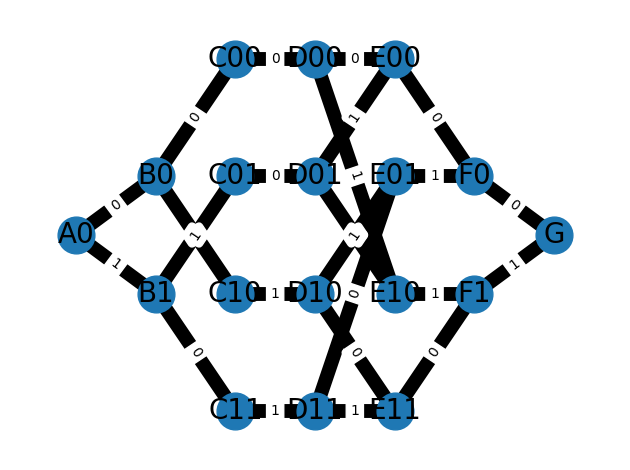

{('A0', 'B0'): 0, ('A0', 'B1'): 1, ('B0', 'C00'): 0, ('B0', 'C10'): 1, ('B1', 'C01'): 1, ('B1', 'C11'): 0, ('C00', 'D00'): 0, ('C01', 'D01'): 0, ('C10', 'D10'): 1, ('C11', 'D11'): 1, ('D00', 'E00'): 0, ('D00', 'E10'): 1, ('D01', 'E00'): 1, ('D01', 'E10'): 0, ('D10', 'E01'): 1, ('D10', 'E11'): 0, ('D11', 'E01'): 0, ('D11', 'E11'): 1, ('E00', 'F0'): 0, ('E01', 'F0'): 1, ('E10', 'F1'): 1, ('E11', 'F1'): 0, ('F0', 'G'): 0, ('F1', 'G'): 1}


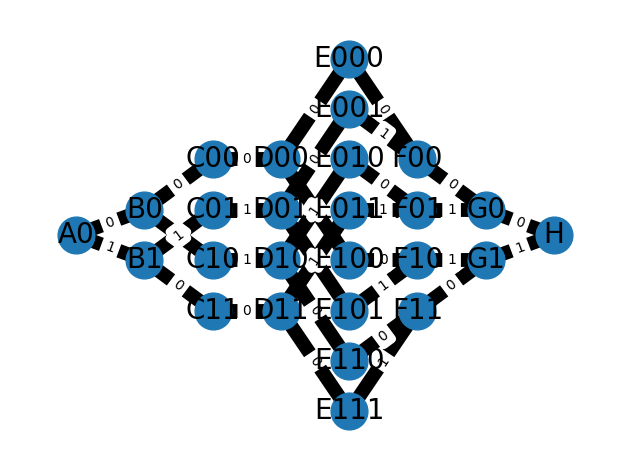

{('A0', 'B0'): 0, ('A0', 'B1'): 1, ('B0', 'C00'): 0, ('B0', 'C10'): 1, ('B1', 'C01'): 1, ('B1', 'C11'): 0, ('C00', 'D00'): 0, ('C01', 'D01'): 1, ('C10', 'D10'): 1, ('C11', 'D11'): 0, ('D00', 'E000'): 0, ('D00', 'E100'): 1, ('D01', 'E001'): 0, ('D01', 'E101'): 1, ('D10', 'E010'): 1, ('D10', 'E110'): 0, ('D11', 'E011'): 1, ('D11', 'E111'): 0, ('E000', 'F00'): 0, ('E001', 'F00'): 1, ('E010', 'F01'): 0, ('E011', 'F01'): 1, ('E100', 'F10'): 0, ('E101', 'F10'): 1, ('E110', 'F11'): 0, ('E111', 'F11'): 1, ('F00', 'G0'): 0, ('F01', 'G0'): 1, ('F10', 'G1'): 1, ('F11', 'G1'): 0, ('G0', 'H'): 0, ('G1', 'H'): 1}


In [49]:
def matrix_to_trellis(matrix): #eeldame, et maatriks on treppiga
    G = nx.Graph()
    m=matrix.transpose()
    active_rows=[[]]
    G.add_node("A0", layer=0)
    for i in range(len(m)):
        how_many=0
        row=[]
        for j in range(len(m[i])):
            if i<find_last_1_in_column(m, j) and i>=find_first_1_in_column(m, j):
                    how_many+=1
                    row.append(j)
        active_rows.append(row)
        nodes=generate_binary_strings(how_many)
        for k in range(len(nodes)):
            letter=number_to_letter(i+2)
            string=letter+str(nodes[k])
            G.add_node(string, layer=i+1)
            if i==0:
                G.add_edge("A0", string, weight=binary_multiply_no_carry(nodes[k][::-1], create_string_from_indices(m[i], active_rows[i+1])))
            elif i+1==len(m):
                letter=number_to_letter(i+1)
                nodes_fit=find_strings_with_letter(list(G.nodes), letter)
                for node in nodes_fit:
                    G.add_edge(node, string, weight=extract_number_from_string(node)+binary_multiply_no_carry(nodes[k][::-1], create_string_from_indices(m[i], active_rows[i+1])))
            elif active_rows[i+1]==active_rows[i]:
                letter=number_to_letter(i+1)
                old_node=letter+str(nodes[k])
                G.add_edge(old_node, string, weight=binary_multiply_no_carry(nodes[k][::-1], create_string_from_indices(m[i], active_rows[i+1])))
            else:
                letter=number_to_letter(i+1)
                nodes_fit=find_strings_with_letter(list(G.nodes), letter)
                if len(nodes_fit[0])<len(string):
                    new_nodes= find_strings_starting_with_binary(nodes_fit, nodes[k][1:])
                    for node in new_nodes:
                        G.add_edge(node, string, weight=binary_multiply_no_carry(nodes[k][::-1], create_string_from_indices(m[i], active_rows[i+1])))
                elif len(nodes_fit[0])>len(string):
                    new_nodes= find_strings_starting_with_binary(nodes_fit, nodes[k])
                    for node in new_nodes:
                        G.add_edge(node, string, weight=(int(node[-1])+binary_multiply_no_carry(nodes[k][::-1], create_string_from_indices(m[i], active_rows[i+1])))%2)
                else:
                    new_nodes= find_strings_starting_with_binary(nodes_fit, replace_first_digit(nodes[k], "0"))
                    for node in new_nodes:
                        G.add_edge(node, string, weight=binary_multiply_no_carry(nodes[k][::-1], create_string_from_indices(m[i], active_rows[i+1])))
                    new_nodes= find_strings_starting_with_binary(nodes_fit, replace_first_digit(nodes[k], "1"))
                    for node in new_nodes:
                        G.add_edge(node, string, weight=(1+binary_multiply_no_carry(nodes[k][::-1], create_string_from_indices(m[i], active_rows[i+1])))%2)

    pos = nx.multipartite_layout(G, subset_key="layer")

    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=700)

    # edges
    nx.draw_networkx_edges(G, pos, edgelist=G.edges, width=10)

    # node labels
    nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
    # edge weight labels
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels)

    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    plt.tight_layout()
    plt.show()
    print(nx.get_edge_attributes(G,'weight'))
    return G
matrix = np.array([[1, 1, 0], [0, 1, 1]])
trellis1 = matrix_to_trellis(matrix)

matrix2 = np.array([[1, 1, 0, 1, 0, 0], [0, 1, 1, 1, 1, 0],[0, 0, 0, 1, 1, 1]])
matrix_to_trellis(matrix2)

matrix3 = np.array([[1,1,1,0,1,0,0], [0,1,1,1,0,1,0],[0,0,0,1,0,1,1 ]])
matrix_to_trellis(matrix3)

In [15]:
print(trellis1.edges)
print(trellis1.nodes)
print(trellis1.get_edge_data('A0', 'B0'))

[('A0', 'B0'), ('A0', 'B1'), ('B0', 'C0'), ('B0', 'C1'), ('B1', 'C0'), ('B1', 'C1'), ('C0', 'D'), ('C1', 'D')]
['A0', 'B0', 'B1', 'C0', 'C1', 'D']
{'weight': 0}


In [74]:
trellis1.neighbors("A0")

## Implementing Viterbi algorithm
Authors: Raido Rehepapp and Helena Sokk

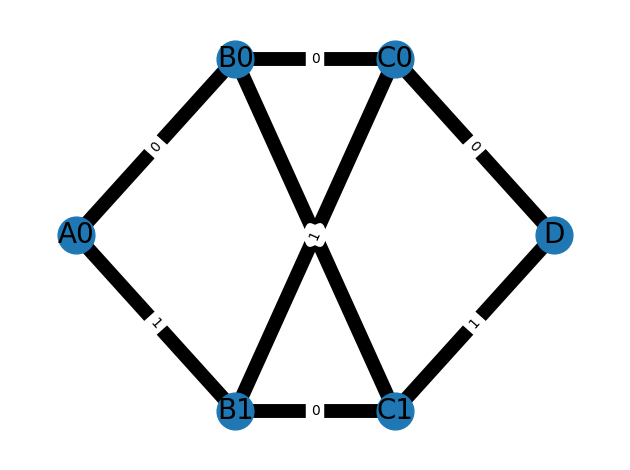

{('A0', 'B0'): 0, ('A0', 'B1'): 1, ('B0', 'C0'): 0, ('B0', 'C1'): 1, ('B1', 'C0'): 1, ('B1', 'C1'): 0, ('C0', 'D'): 0, ('C1', 'D'): 1}
Received sequence: [0, 0, 0]
Decoded bits: [1 0 0]


In [87]:
import numpy as np

def viterbi_decoder(received_sequence, trellis):
    num_states = 2 ** (trellis.number_of_nodes() - 1)

    # Create a dictionary to map node names to indices (both ways)
    node_to_index = {node_name: index for index, node_name in enumerate(trellis.nodes())}
    index_to_node = {index: node_name for node_name, index in node_to_index.items()}

    path_metrics = np.zeros((num_states, len(received_sequence) + 1))
    paths = np.zeros((num_states, len(received_sequence)), dtype=int)

    # Initialization
    path_metrics[:, 0] = 0

    # main loop
    for time_step, received_bit in enumerate(received_sequence):
        for state in trellis.nodes():
            for next_state in trellis.neighbors(state):
                # Calculate branch metric based on the difference between received bit and edge weight
                edge_data = trellis[state][next_state]
                branch_metric_1 = (received_bit + edge_data["weight"]) % 2
                branch_metric_2 = (received_bit - edge_data["weight"]) % 2
                branch_metric = min(branch_metric_1, branch_metric_2)
                new_metric = path_metrics[node_to_index[state], time_step] + branch_metric

                if time_step == 0 or new_metric < path_metrics[node_to_index[next_state], time_step + 1]:
                    path_metrics[node_to_index[next_state], time_step + 1] = new_metric
                    paths[node_to_index[next_state], time_step] = 0 if branch_metric == 0 else 1

    # Traceback
    decoded_bits = np.zeros(len(received_sequence), dtype=int)
    best_last_state = np.argmin(path_metrics[:, -1])
    for time_step in range(len(received_sequence) - 1, -1, -1):
        decoded_bits[time_step] = paths[best_last_state, time_step]
        neighbors = list(trellis.neighbors(index_to_node[best_last_state]))
        best_last_state = node_to_index[neighbors[decoded_bits[time_step]]]

    return decoded_bits

received_sequence = [0, 0, 0]

matrix = np.array([[1, 1, 0], [0, 1, 1]])
trellis = matrix_to_trellis(matrix)

decoded_bits = viterbi_decoder(received_sequence, trellis)

print("Received sequence:", received_sequence)
print("Decoded bits:", decoded_bits)